# What this file contains

-   All figures from data measured with Ca\textsuperscript{+} ion

In [1]:
from plot_functions import *
c_scheme = ["#ffb400", "#d2980d", "#a57c1b", "#786028", "#363445", "#48446e", "#5e569b", "#776bcd", "#9080ff"]

In [2]:
# import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import math

In [3]:
# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [4]:
# Load data
data = pd.read_csv('data/oct_14_f0_for_oscillating_B.csv')

time_1 = data.ms[0:11]*1e-3
f0_1 = data.f_minus_f0[0:11]*1e3

time_2 = data.ms[11:21]*1e-3
f0_2 = data.f_minus_f0[11:21]*1e3

time_full = data.ms*1e-3
f0_full = data.f_minus_f0*1e3

In [5]:
# fit four harmonics
def f(t, A, B1, B2, B3, B4, phi1, phi2, phi3, phi4):
    B = [B1, B2, B3, B4]
    phi = [phi1, phi2, phi3, phi4]
    y = A
    for i in range(1, 5):
#        y += B[i - 1] * np.cos(2 * np.pi * 50 * i * (t - xshift) + phi[i - 1])
        y += B[i - 1] * np.cos(2 * np.pi * 50 * i * (t) + phi[i - 1])
    # y += yshift
    return y

In [6]:
# fit all data heartpiece <3 NO COMP

A = 3.0639

B = np.array([
    5.426641791844047,   # B1
    0.1805639197657282,  # B2
    1.11655701832264,    # B3
    0.1574098079737187,  # B4
])

phi = np.array([
    2.8662360325547045,  # phi1
    1.1819633603404307,  # phi2
    3.974799641899309,   # phi3
    8.841432126156944e-20,  # phi4
])

initial_guess = [
    A, 
    *B,
    *phi
]

ttt = np.linspace(min(time_full), max(time_full), 1000)
yyy = f(ttt, *initial_guess)

boundaries=(
    [0, 0,0,0,0,0,0,0,0],
    [10, 10,10,10,10, 2*np.pi,2*np.pi,2*np.pi,2*np.pi]
)

params_01, covariance_01 = curve_fit(f, time_1, f0_1, p0=initial_guess, bounds=boundaries)
params_02, covariance_02 = curve_fit(f, time_2, f0_2, p0=initial_guess, bounds=boundaries)
params, covariance = curve_fit(f, time_full, f0_full, p0=initial_guess, bounds=boundaries)


print(f"max: {max(f(ttt,*params))} kHz")
print(f"min: {min(f(ttt,*params))} kHz")
print(f"Delta kHz = {max(f(ttt,*params)) - min(f(ttt,*params))}\n")

print(f"max: {max(f(ttt,*params_01))} kHz")
print(f"min: {min(f(ttt,*params_01))} kHz")
print(f"Delta kHz = {max(f(ttt,*params_01)) - min(f(ttt,*params))}\n")

print(f"max: {max(f(ttt,*params_02))} kHz")
print(f"min: {min(f(ttt,*params_02))} kHz")
print(f"Delta kHz = {max(f(ttt,*params_02)) - min(f(ttt,*params))}")

fit_vals = [params, params_01, params_02]
print()
for fit in fit_vals:
    for fit_val in fit:
        print(fit_val)
    print()


max: 9.310064484020153 kHz
min: -2.7222057505828037 kHz
Delta kHz = 12.032270234602956

max: 9.665381032222589 kHz
min: -2.6463691143339045 kHz
Delta kHz = 12.387586782805393

max: 8.97694753227419 kHz
min: -2.743844983462634 kHz
Delta kHz = 11.699153282856994

3.0563608486672793
5.422872728137907
0.17577896725953784
1.1207248886655945
0.15352758466830915
2.86678354206754
1.1799265948543491
3.972675656109399
3.2583263362900267e-24

3.372631578687296
5.573963566167642
0.22744745467298655
1.0859079632324111
0.21944164672892966
2.8793616046575248
2.0792354838761256
3.9730552307666183
0.15985880437814115

2.7199999990983863
5.304625511272895
0.3052502361341067
1.1207801598918932
0.12291796501894603
2.8488763853877828
0.569443847708451
3.990026239451769
9.415246200089461e-31



In [7]:
# fit params and errors

# Function to format and print parameters with customizable significant figures
def print_fit_parameters(params, param_errors, dataset_name, param_sigfigs=2, error_sigfigs=2):
    param_names = ["A1", "B1", "B2", "B3", "B4", "phi1", "phi2", "phi3", "phi4"]
    print(f"Fit Parameters for {dataset_name}:")
    for i, (param, error) in enumerate(zip(params, param_errors)):
        print(f"{param_names[i]} = {param:.{param_sigfigs}f} ± {error:.{error_sigfigs}f}")
    print()  # Blank line for spacing

# Example: Customizable significant figures for parameters and errors
param_sigfigs = 2  # Set number of significant figures for parameters
error_sigfigs = 2  # Set number of significant figures for uncertainties

# For the combined dataset
A1, B1, B2, B3, B4, phi1, phi2, phi3, phi4 = params
param_errors_full = np.sqrt(np.diag(covariance))
print_fit_parameters(params, param_errors_full, "combined dataset", param_sigfigs, error_sigfigs)

# For the first dataset
A1, B1, B2, B3, B4, phi1, phi2, phi3, phi4 = params_01
param_errors_01 = np.sqrt(np.diag(covariance_01))
print_fit_parameters(params_01, param_errors_01, "first dataset", param_sigfigs, error_sigfigs)

# For the second dataset
A1, B1, B2, B3, B4, phi1, phi2, phi3, phi4 = params_02
param_errors_02 = np.sqrt(np.diag(covariance_02))
print_fit_parameters(params_02, param_errors_02, "second dataset", param_sigfigs, error_sigfigs)



Fit Parameters for combined dataset:
A1 = 3.06 ± 0.12
B1 = 5.42 ± 0.17
B2 = 0.18 ± 0.17
B3 = 1.12 ± 0.17
B4 = 0.15 ± 0.17
phi1 = 2.87 ± 0.03
phi2 = 1.18 ± 0.97
phi3 = 3.97 ± 0.15
phi4 = 0.00 ± 1.10

Fit Parameters for first dataset:
A1 = 3.37 ± 0.10
B1 = 5.57 ± 0.14
B2 = 0.23 ± 0.14
B3 = 1.09 ± 0.14
B4 = 0.22 ± 0.14
phi1 = 2.88 ± 0.03
phi2 = 2.08 ± 0.61
phi3 = 3.97 ± 0.13
phi4 = 0.16 ± 0.64

Fit Parameters for second dataset:
A1 = 2.72 ± 0.22
B1 = 5.30 ± 0.32
B2 = 0.31 ± 0.32
B3 = 1.12 ± 0.32
B4 = 0.12 ± 0.32
phi1 = 2.85 ± 0.06
phi2 = 0.57 ± 1.03
phi3 = 3.99 ± 0.28
phi4 = 0.00 ± 2.57



In [8]:
# R^2 for the first dataset
y_fit_1 = f(time_1, *params_01)
y_mean_1 = np.mean(f0_1)
sst_1 = np.sum((f0_1 - y_mean_1)**2)
ssr_1 = np.sum((f0_1 - y_fit_1)**2)
r_squared_1 = 1 - (ssr_1 / sst_1)
print(f"R^2 for fit to first dataset: {r_squared_1}")

# R^2 for the second dataset
y_fit_2 = f(time_2, *params_02)
y_mean_2 = np.mean(f0_2)
sst_2 = np.sum((f0_2 - y_mean_2)**2)
ssr_2 = np.sum((f0_2 - y_fit_2)**2)
r_squared_2 = 1 - (ssr_2 / sst_2)
print(f"R^2 for fit to second dataset: {r_squared_2}")

# R^2 for both datasets
y_fit_full = f(time_full, *params)
y_mean_full = np.mean(f0_full)
sst_full = np.sum((f0_full - y_mean_full)**2)
ssr_full = np.sum((f0_full - y_fit_full)**2)
r_squared_full = 1 - (ssr_full / sst_full)
print(f"R^2 for fit to both datasets: {r_squared_full}")



R^2 for fit to first dataset: 0.9988168979459863
R^2 for fit to second dataset: 0.9966316659624606
R^2 for fit to both datasets: 0.9891157910461353


# Static comp ON

In [9]:
# read data STATIC COMP HEARTPIECE

b_field_ca_measurement_with_static_and_active_comp = "data/okt_21_b_field_measurement_by_ion_with_active_and_static_comp.csv"
data_b_ca_staticandactive_comp = pd.read_csv(b_field_ca_measurement_with_static_and_active_comp)

t_comp_full = data_b_ca_staticandactive_comp.ms*1e-3
f_comp_full = data_b_ca_staticandactive_comp.f_minus_f0*1e3

t_comp_01 = data_b_ca_staticandactive_comp.ms[:11]*1e-3
f_comp_01 = data_b_ca_staticandactive_comp.f_minus_f0[:11]*1e3

t_comp_01 = data_b_ca_staticandactive_comp.ms[:10]*1e-3
f_comp_01 = data_b_ca_staticandactive_comp.f_minus_f0[:10]*1e3


t_comp_02 = data_b_ca_staticandactive_comp.ms[11:]*1e-3
f_comp_02 = data_b_ca_staticandactive_comp.f_minus_f0[11:]*1e3

# only data point 5
extra_t_comp_01 = data_b_ca_staticandactive_comp.ms[10:11]*1e-3
extra_f_comp_01 = data_b_ca_staticandactive_comp.f_minus_f0[10:11]*1e3

In [10]:
# fit three harmonics to STATIC COMP
def three_harmonics(t, A, B1, B2, B3, phi1, phi2, phi3):
    B = [B1, B2, B3]
    phi = [phi1, phi2, phi3]
    y = A
    for i in range(1, 4):
#        y += B[i - 1] * np.cos(2 * np.pi * 50 * i * (t - xshift) + phi[i - 1])
        y += B[i - 1] * np.cos(2 * np.pi * 50 * i * (t) + phi[i - 1])
    # y += yshift
    return y

In [11]:
# fit all data heartpiece <3

A = 2.0639

B = np.array([
    0.0,   # B1
    0.0,  # B2
    1.0,    # B3
])

phi = np.array([
    0,
    0,
    0   # phi3
])

initial_guess_NOCOMP = [
    A, 
    *B,
    *phi
]

ttt_NOCOMP = np.linspace(min(t_comp_01), max(t_comp_01), 1000)
yyy_NOCOMP = three_harmonics(ttt_NOCOMP, *initial_guess_NOCOMP)

boundaries=(
    [0,0,0,0,0,0,0,],
    [10,10,10,10, 2*np.pi,2*np.pi,2*np.pi]
)

params_01_nocomp, covariance_01_nocomp = curve_fit(three_harmonics, t_comp_01, f_comp_01, p0=initial_guess_NOCOMP, bounds=boundaries)


In [12]:
# b splines dataset 01

from scipy.interpolate import make_interp_spline

# Your data points
time = t_comp_01.to_numpy()
frequency_fluctuation = f_comp_01.to_numpy()

# Sort data points by time for smooth interpolation
sorted_indices = np.argsort(time)
time_sorted = time[sorted_indices]
frequency_sorted = frequency_fluctuation[sorted_indices]

# Create a B-spline representation of the data
spline = make_interp_spline(time_sorted, frequency_sorted, k=3)  # k=3 for cubic B-spline

# Generate new time values for smooth curve
time_new_bspline01 = np.linspace(time_sorted.min(), time_sorted.max(), 300)
frequency_smooth_bspline01 = spline(time_new_bspline01)


In [13]:
# b splines dataset 02

# Updated data points
time = t_comp_02.to_numpy()
frequency_fluctuation = f_comp_02.to_numpy()

# Sort data points by time for smooth interpolation
sorted_indices = np.argsort(time)
time_sorted = time[sorted_indices]
frequency_sorted = frequency_fluctuation[sorted_indices]

# Create a B-spline representation of the data
spline = make_interp_spline(time_sorted, frequency_sorted, k=3)  # k=3 for cubic B-spline

# Generate new time values for smooth curve
time_new_bspline02 = np.linspace(time_sorted.min(), time_sorted.max(), 300)
frequency_smooth_bspline_02 = spline(time_new_bspline02)


In [14]:
# newton interpolation data set 01

from scipy.interpolate import KroghInterpolator

# Your data points
time = t_comp_01.to_numpy()
frequency_fluctuation = f_comp_01.to_numpy()

# Sort data points by time to prevent issues with interpolation
sorted_indices = np.argsort(time)
time_sorted = time[sorted_indices]
frequency_sorted = frequency_fluctuation[sorted_indices]

# Create Newton interpolator
newton_interpolator = KroghInterpolator(time_sorted, frequency_sorted)

# Generate new time values for smooth curve
time_new_newton01 = np.linspace(time_sorted.min(), time_sorted.max(), 300)
frequency_newton01 = newton_interpolator(time_new_newton01)



In [15]:
# newton interpolation data set 02

from scipy.interpolate import KroghInterpolator

# Updated data points
time = t_comp_02.to_numpy()
frequency_fluctuation = f_comp_02.to_numpy()

# Sort data points by time to prevent issues with interpolation
sorted_indices = np.argsort(time)
time_sorted = time[sorted_indices]
frequency_sorted = frequency_fluctuation[sorted_indices]

# Create Newton interpolator
newton_interpolator = KroghInterpolator(time_sorted, frequency_sorted)

# Generate new time values for smooth curve
time_new_newton02 = np.linspace(time_sorted.min(), time_sorted.max(), 300)
frequency_newton02 = newton_interpolator(time_new_newton02)



In [16]:
splitted_set = [

    [time_1, f0_1, "Dataset 1, AC", c_scheme[0], "", "s"], # dataset 1
    [ttt, f(ttt, *params_01), "Fit, 1st dataset, AC", c_scheme[0], "-", ""], # Fit, 1st dataset

    [time_2, f0_2, "Dataset 2, AC", c_scheme[1], "", "s"], # dataset 2
    [ttt, f(ttt, *params_02), "Fit, 2nd dataset, AC", c_scheme[1], "-", ""], # Fit, 2nd dataset

    [ttt, f(ttt, *params), "Fit, both data set, AC", c_scheme[2], "-", ""], # Fit, both data set

    [t_comp_01, f_comp_01, "Dataset 1, SC", c_scheme[7], "", "s"], # comp 1
    [time_new_bspline01, frequency_smooth_bspline01, "Fit, 1st dataset, SC ", c_scheme[7], "-", ""], # bspline1

    [t_comp_02, f_comp_02, "Dataset 2, SC", c_scheme[8], "", "s"], # comp2 
    [time_new_bspline02, frequency_smooth_bspline_02, "Fit, 2nd dataset, SC ", c_scheme[8], "-", ""], # bspline2

    # [time_new_newton01, frequency_newton01, "Data compensation 1 newton interpolation", c_scheme[0], "-", ""], # newton interpolation
    # [time_new_newton02, frequency_newton02, "Data compensation 2 newton interpolation", c_scheme[4], "-", ""], # newton interpolation
]

from_ca = [

    # [time_1-0.005, f0_1, "Dataset 1, AC", c_scheme[0], "", "s"], # dataset 1
    # [ttt-0.005, f(ttt, *params_01), "Fit, 1st dataset, AC", c_scheme[0], "-", ""], # Fit, 1st dataset

    # [time_2-0.005, f0_2, "Dataset 2, AC", c_scheme[1], "", "s"], # dataset 2

    # [ttt-0.005, f(ttt, *params_02), "Fit, 2nd dataset, AC", c_scheme[1], "-", ""], # Fit, 2nd dataset

    [ttt-0.0047, f(ttt, *params), r"Ca\textsuperscript{+}, Oct 21st", c_scheme[0], "-", ""], # Fit, both data set
]



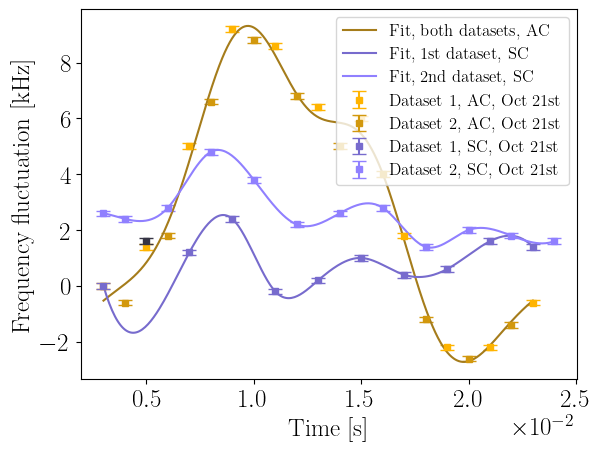

9.310064484020153 -2.7222057505828037 12.032270234602956
2.538199868363599 -1.678047904126711 4.21624777249031
4.868267849665424 1.370585177325416 3.497682672340008
4.868267849665424 -1.678047904126711 6.546315753792134


In [17]:
# REMAKE WITH ERRORS

test_error = np.full(len(f0_1), 0.1)


list_a = [

    [time_1, f0_1, np.full(len(f0_1), 0.1), "Dataset 1, AC, Oct 21st", c_scheme[0], "", "s"], # dataset 1


    [time_2, f0_2, np.full(len(f0_2), 0.1), "Dataset 2, AC, Oct 21st", c_scheme[1], "", "s"], # dataset 2


    [t_comp_01, f_comp_01, np.full(len(f_comp_01), 0.1), "Dataset 1, SC, Oct 21st", c_scheme[7], "", "s"], # comp 1


    [t_comp_02, f_comp_02, np.full(len(f_comp_02), 0.1), "Dataset 2, SC, Oct 21st", c_scheme[8], "", "s"], # comp2 

    # [t_comp_02, f_comp_02, np.full(len(f_comp_02), 0.1), "Dataset 2, SC, Oct 21st", c_scheme[8], "", "s"], # comp2 

    [extra_t_comp_01, extra_f_comp_01, 0.1, "", c_scheme[4], "", "s"],
]

list_b = [
    # [ttt, f(ttt, *params_01), "Fit, 1st dataset, AC", c_scheme[0], "-", ""], # Fit, 1st dataset

    # [ttt, f(ttt, *params_02), "Fit, 2nd dataset, AC", c_scheme[1], "-", ""], # Fit, 2nd dataset

    [ttt, f(ttt, *params), "Fit, both datasets, AC", c_scheme[2], "-", ""], # Fit, both data set

    [time_new_bspline01, frequency_smooth_bspline01, "Fit, 1st dataset, SC ", c_scheme[7], "-", ""], # bspline1

    [time_new_bspline02, frequency_smooth_bspline_02, "Fit, 2nd dataset, SC ", c_scheme[8], "-", ""], # bspline2
]

one_axis__N_Y_with_error_bars__with_N_fits(list_a, list_b, name_x=r"Time [s]", name_y="Frequency fluctuation [kHz]", plot_title="", filename_to_save="python_figures/heart_piece", marker_type="s", marker_size="5", capsize_errorbars=5, alpha_data=1.0, font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5, legend_size=12)

print( max(f(ttt, *params)), min(f(ttt, *params)), max(f(ttt, *params))-min(f(ttt, *params)) )

print(max(frequency_smooth_bspline01), min(frequency_smooth_bspline01), max(frequency_smooth_bspline01) - min(frequency_smooth_bspline01))

print(max(frequency_smooth_bspline_02), min(frequency_smooth_bspline_02), max(frequency_smooth_bspline_02) - min(frequency_smooth_bspline_02))

print(max(frequency_smooth_bspline_02), min(frequency_smooth_bspline01), max(frequency_smooth_bspline_02)-min(frequency_smooth_bspline01))



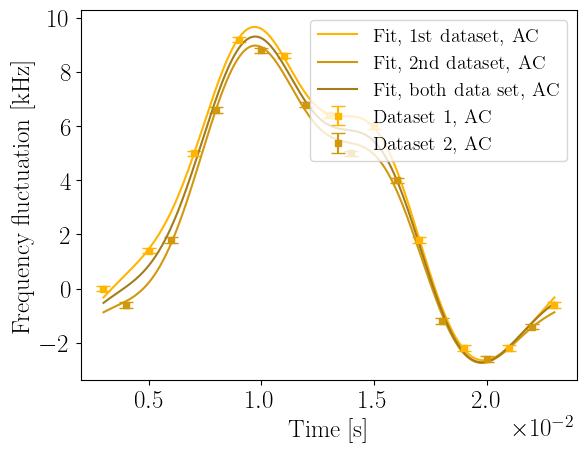

9.310064484020153 -2.7222057505828037 12.032270234602956
2.538199868363599 -1.678047904126711 4.21624777249031
4.868267849665424 1.370585177325416 3.497682672340008
4.868267849665424 -1.678047904126711 6.546315753792134


In [18]:
# REMAKE WITH ERRORS

test_error = np.full(len(f0_1), 0.1)


list_a = [

    [time_1, f0_1, np.full(len(f0_1), 0.1), "Dataset 1, AC", c_scheme[0], "", "s"], # dataset 1


    [time_2, f0_2, np.full(len(f0_2), 0.1), "Dataset 2, AC", c_scheme[1], "", "s"], # dataset 2



]

list_b = [
    [ttt, f(ttt, *params_01), "Fit, 1st dataset, AC", c_scheme[0], "-", ""], # Fit, 1st dataset

    [ttt, f(ttt, *params_02), "Fit, 2nd dataset, AC", c_scheme[1], "-", ""], # Fit, 2nd dataset

    [ttt, f(ttt, *params), "Fit, both data set, AC", c_scheme[2], "-", ""], # Fit, both data set

]

one_axis__N_Y_with_error_bars__with_N_fits(list_a, list_b, name_x=r"Time [s]", name_y="Frequency fluctuation [kHz]", plot_title="", filename_to_save="python_figures/bfield_from_ca", marker_type="s", marker_size="5", capsize_errorbars=5, alpha_data=1.0, font_size=18, offset_text_size=18, legend_local = 1, x_ticks_limit=5)

print( max(f(ttt, *params)), min(f(ttt, *params)), max(f(ttt, *params))-min(f(ttt, *params)) )

print(max(frequency_smooth_bspline01), min(frequency_smooth_bspline01), max(frequency_smooth_bspline01) - min(frequency_smooth_bspline01))

print(max(frequency_smooth_bspline_02), min(frequency_smooth_bspline_02), max(frequency_smooth_bspline_02) - min(frequency_smooth_bspline_02))

print(max(frequency_smooth_bspline_02), min(frequency_smooth_bspline01), max(frequency_smooth_bspline_02)-min(frequency_smooth_bspline01))

In [19]:
# Initial and new measurement values
initial_value = 12.0
new_measurements = [2.9, 3.5, 5.3]

# Calculate percentage improvements
improvements = [(initial_value - new_value) / initial_value * 100 for new_value in new_measurements]
improvements


import numpy as np

# Initial values and uncertainties
initial_value = 12.0  # initial measurement value in kHz
initial_uncertainty = 0.4  # uncertainty in initial measurement in kHz

# New measurements and their uncertainties
new_measurements = [2.9, 3.5, 5.3]  # new measurement values in kHz
new_uncertainties = [0.1, 0.1, 0.1]  # uncertainties for new measurements in kHz

# Calculate improvements and their propagated uncertainties
improvement_percentages = []
uncertainties_in_improvement = []

for new_value, new_uncertainty in zip(new_measurements, new_uncertainties):
    # Calculate improvement percentage
    improvement = (initial_value - new_value) / initial_value * 100
    improvement_percentages.append(improvement)
    
    # Calculate propagated uncertainty in the improvement percentage
    uncertainty = improvement * np.sqrt((initial_uncertainty / initial_value) ** 2 +
                                        (new_uncertainty / new_value) ** 2)
    uncertainties_in_improvement.append(uncertainty)

improvement_percentages, uncertainties_in_improvement



([75.83333333333333, 70.83333333333334, 55.833333333333336],
 [3.636974693672952, 3.1097669796424428, 2.1385767894448695])

# 20 ms axis

In [20]:
# read data

file_oct_15_no_comp_1 = "data/oct_15_no_comp_1 (copy).csv"
data_oct_15_no_comp_1 = pd.read_csv(file_oct_15_no_comp_1, sep="\t")

# time_oct_15_no_comp_1 = (data_oct_15_no_comp_1.time_ms_1 / 2)*1e-3
time_oct_15_no_comp_1 = (data_oct_15_no_comp_1.time_ms_1 / 2)
AI_oct_15_no_comp_1 = data_oct_15_no_comp_1.analog_input

# read data

file_oct_15_active_comp_1_ = "data/Bfielddata_Students2024/okt_15_active_comp_1.csv"
data_oct_15_active_comp_1_ = pd.read_csv(file_oct_15_active_comp_1_, sep="\t")

# time_oct_15_active_comp_1_ = (data_oct_15_active_comp_1_.analog_output / 2)*1e-3
time_oct_15_active_comp_1_ = (data_oct_15_active_comp_1_.analog_output / 2)
AI_oct_15_active_comp_1_ = data_oct_15_active_comp_1_.time_ms_2

In [21]:
# fit func

def fitfunc(t, A, B1, B2, B3, B4, phi1, phi2, phi3, phi4, scale):
    B = [B1, B2, B3, B4]
    phi = [phi1, phi2, phi3, phi4]
    y = A
  

    for i in range(1, 5):
        # print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
        # y += B[i - 1] * np.cos(scale * (2*np.pi)*50*i*(t) + phi[i - 1])
        y += B[i - 1] * np.cos(scale *(2*np.pi)*i*(t) + phi[i - 1])

    return y

In [22]:
# get a good initial guess for "no compensation"

ss = 2500

B = [2.329/ss, 0.067/ss, 1.046/ss, 0.038/ss]
phi = np.array([0,0,-np.pi,0])

phi = phi - 1.5

A = 4.868
scale = 1/(40*1e3)

initial_guess = [A, *B, *phi, scale]

x_guess = np.linspace(0,20,10000)
y_guess = fitfunc(x_guess, A, *B, *phi, scale)

In [23]:
# get a good initial guess for "yes compensation"

ss = 15000

B = [2.329/ss, 0.067/ss, 10.046/ss, 0.038/ss]
phi = np.array([0,0,-np.pi,0])

phi = phi

A = 4.8675
scale = 1/40

initial_guess = [A, *B, *phi, scale]

# print(initial_guess)

fitted_x_YC = np.linspace(0,20,10000)
y_guess = fitfunc(fitted_x_YC, A, *B, *phi, scale)

In [24]:
# fit

boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc, time_oct_15_no_comp_1, AI_oct_15_no_comp_1, p0=initial_guess, bounds=boundaries)

fitted_y = fitfunc(x_guess, *params)

# print("Fit parameters:")
# #fit_parameter_names = ["A",  "B1",   "B2",   "B3",   "B4", "phi1", "phi2", "phi3", "phi4", "xshift", "yshift"]
# fit_parameter_names = ["A",  "B1",   "B2",   "B3",   "B4", "phi1", "phi2", "phi3", "phi4", "scale"]
# for index, parameter in enumerate(params):
#     print(f"{fit_parameter_names[index]}: {parameter}")



In [25]:
# # fit

# boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
# params, covariance = curve_fit(fitfunc, time_oct_15_active_comp_1_, AI_oct_15_active_comp_1_, p0=initial_guess, bounds=boundaries)

# fitted_y_YC = fitfunc(fitted_x_YC, *params)

In [26]:
file_okt_21_static_comp_monday_optimized_the_setup = "data/Bfielddata_Students2024/okt_21_static_comp_monday_optimized_the_setup.csv"
data_okt_21_static_comp_monday_optimized_the_setup = pd.read_csv(file_okt_21_static_comp_monday_optimized_the_setup, sep="\t")

time_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.analog_output / 2

AI_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.time_ms_2



aaaa = [
    [time_oct_15_no_comp_1, AI_oct_15_no_comp_1, "No compensation, Oct 18th", c_scheme[0], "-", "s"], # dataset 1
    [x_guess, fitted_y, "Fit, no compensation", c_scheme[0],  "-", ""],

    # [time_oct_15_active_comp_1_, AI_oct_15_active_comp_1_, "SC", c_scheme[7], "", "s"],
    # # [x_guess, y_guess, "oct_15_no_comp_1 fit", c_scheme[7],  "-", ""],
    # [fitted_x_YC, fitted_y_YC, "Fit, SC", c_scheme[7], "-", ""],

    [time_okt_21_static_comp_monday_optimized_the_setup*1e-3, AI_okt_21_static_comp_monday_optimized_the_setup, "Static compensation, Oct 21st", c_scheme[8],  "-", "s"]
]


#     


print(max(fitted_y))
print(min(fitted_y))

print(f"delta fit bfield =  {(max(fitted_y) - min(fitted_y))*1e3} mG")



4.869449760378331
4.866471719151092
delta fit bfield =  2.9780412272391033 mG


In [27]:


# # oct_15_no_comp_1 AND oct_15_active_comp_1
# plot_with_one_axis(aaaa, name_x="Time [ms]", name_y="Analog input [V]", plot_title="", filename_to_save="nosvg", marker_size="4", font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5, legend_size=18*(4/6))


# 0.02 s axis

In [28]:
# # read data

# time_oct_15_no_comp_1 = (data_oct_15_no_comp_1.time_ms_1 / 2)*1e-3
# AI_oct_15_no_comp_1 = data_oct_15_no_comp_1.analog_input

# # read data

# file_oct_15_active_comp_1_ = "data/Bfielddata_Students2024/okt_15_active_comp_1.csv"
# data_oct_15_active_comp_1_ = pd.read_csv(file_oct_15_active_comp_1_, sep="\t")

# time_oct_15_active_comp_1_ = (data_oct_15_active_comp_1_.analog_output / 2)*1e-3
# AI_oct_15_active_comp_1_ = data_oct_15_active_comp_1_.time_ms_2

# def fitfunc(t, A, B1, B2, B3, B4, phi1, phi2, phi3, phi4, scale):
#     B = [B1, B2, B3, B4]
#     phi = [phi1, phi2, phi3, phi4]
#     y = A
  

#     for i in range(1, 5):
#         # print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
#         # y += B[i - 1] * np.cos(scale * (2*np.pi)*50*i*(t) + phi[i - 1])
#         y += B[i - 1] * np.cos(scale *(2*np.pi)*i*(t) + phi[i - 1])

#     return y

# # get a good initial guess for "yes compensation"

# ss = 15000

# B = [2.329/ss, 0.067/ss, 10.046/ss, 0.038/ss]
# phi = np.array([0,0,-np.pi,0])

# phi = phi

# A = 4.8675
# scale = 1/(40*1e-3)

# initial_guess = [A, *B, *phi, scale]

# # print(initial_guess)

# fitted_x_YC = np.linspace(0,20*1e-3,10000)
# y_guess = fitfunc(fitted_x_YC, A, *B, *phi, scale)

# boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
# params, covariance = curve_fit(fitfunc, time_oct_15_active_comp_1_, AI_oct_15_active_comp_1_, p0=initial_guess, bounds=boundaries)

# fitted_y_YC = fitfunc(fitted_x_YC, *params)

In [29]:
# boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
# params, covariance = curve_fit(fitfunc, time_oct_15_no_comp_1, AI_oct_15_no_comp_1, p0=initial_guess, bounds=boundaries)

# x_guess = np.linspace(0,20*1e-3,10000)

# fitted_y = fitfunc(x_guess, *params)

In [30]:
# aaaa = [
#     [time_oct_15_no_comp_1, AI_oct_15_no_comp_1, "No compensation", c_scheme[0], "", "s"], # dataset 1
#     [x_guess, fitted_y, "Fit, no compensation", c_scheme[0],  "-", ""],
#     [time_oct_15_active_comp_1_, AI_oct_15_active_comp_1_, "SC", c_scheme[7], "", "s"],
#     # [fitted_x_YC, y_guess, "oct_15_no_comp_1 fit", c_scheme[7],  "-", ""],
#     [fitted_x_YC, fitted_y_YC, "Fit, SC", c_scheme[7], "-", ""]
# ]

# from_B = [
#     # [time_oct_15_no_comp_1, AI_oct_15_no_comp_1, "oct_15_no_comp_1", c_scheme[7], "", "s"], # dataset 1
#     [x_guess, fitted_y, "B-field detector", c_scheme[7],  "-", ""],
# ]



# # oct_15_no_comp_1 AND oct_15_active_comp_1
# plot_with_one_axis(aaaa, name_x="Time [s]", name_y="Analog input [V]", plot_title="", filename_to_save="nosvg", marker_size="4", font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5, legend_size=18*(4/6))




# shape from oct 18 

In [31]:
# read data

file_okt_18_static_comp_2 = "data/Bfielddata_Students2024/okt_18_static_comp2.csv"
data_18_okt_static_comp_2 = pd.read_csv(file_okt_18_static_comp_2, sep="\t")

time_okt_18_static_comp_2 = data_18_okt_static_comp_2.time_ms_1 / 2
AI_okt_18_static_comp_2 = data_18_okt_static_comp_2.analog_input

OTHER_time_okt_18_static_comp_2 = data_18_okt_static_comp_2.time_ms_1 / 2
OTHER_AI_okt_18_static_comp_2 = data_18_okt_static_comp_2.analog_output



# read data

file_okt_18_no_comp_2 = "data/Bfielddata_Students2024/okt_18_no_comp_2.csv"
data_18_okt_no_comp_2 = pd.read_csv(file_okt_18_no_comp_2, sep="\t")

time_okt_18_no_comp_2 = data_18_okt_no_comp_2.analog_output
AI_okt_18_no_comp_2 = data_18_okt_no_comp_2.time_ms_2

OTHER_time_okt_18_no_comp_2 = data_18_okt_no_comp_2.analog_output
OTHER_AI_okt_18_no_comp_2 = data_18_okt_no_comp_2.time_ms_1


time_okt_18_no_comp_2_judith = time_okt_18_no_comp_2*1e-3 / 2
AI_okt_18_no_comp_2_judith = AI_okt_18_no_comp_2

time_okt_18_static_comp_2_judith = data_18_okt_static_comp_2.time_ms_1*1e-3 / 2
AI_okt_18_static_comp_2_judith = data_18_okt_static_comp_2.analog_input

try_fit_time_okt_21_static_comp_monday_optimized_the_setup = time_okt_21_static_comp_monday_optimized_the_setup
try_fit_AI_okt_21_static_comp_monday_optimized_the_setup = AI_okt_21_static_comp_monday_optimized_the_setup



# get a good initial guess for "no_comp_2"

# fit_two_harmonics 

ss = 15000
B = [2.329/ss, 0.067/ss, 10.046/ss, 0.038/ss]
phi = np.array([0,0,-np.pi,0])
phi = phi
A = 4.8675
scale = 1/(40*1e-3)
initial_guess = [A, *B, *phi, scale]
# print(initial_guess)
fitted_x_YC = np.linspace(0,20*1e-3,10000)
y_guess = fitfunc(fitted_x_YC, A, *B, *phi, scale)
boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc, time_okt_18_no_comp_2_judith, AI_okt_18_no_comp_2_judith, p0=initial_guess, bounds=boundaries)
fitted_y_YC_oct18 = fitfunc(fitted_x_YC, *params)



like_judith = [[fitted_x_YC-0.00006, fitted_y_YC_oct18, "B-field detector, Oct 18th", c_scheme[8],  "-", ""]]


# plot_with_one_axis(like_judith, name_x="Time [s]", name_y="Analog input [V]", plot_title="", filename_to_save="nosvg", marker_size="4", font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5, legend_size=16*(5/6))


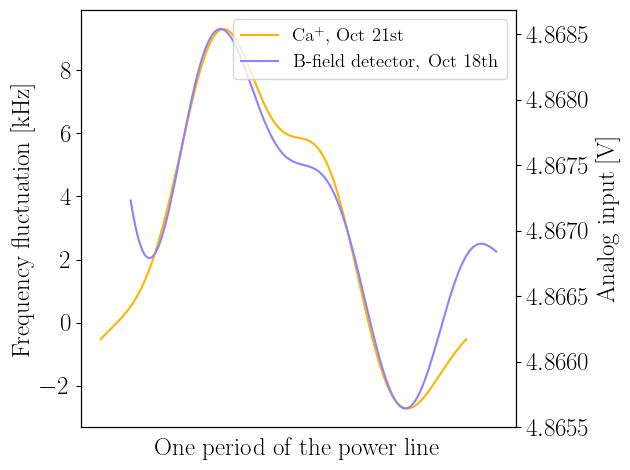

In [32]:


plot_with_two_axes_with_N_curves_with_VERTICAL_lines(from_ca, like_judith, "One period of the power line", "Frequency fluctuation [kHz]", "Analog input [V]", col_ax1 = "black", col_ax2="black", plot_title="", filename_to_save="python_figures/test_overlay_heart_piece",  marker_size="3", font_size=18, legend_size=18*(3/4), legend_local=1, vlines=None, x_ticks=False) #, vlines=[[0.02, "red", "-"]])


In [33]:
# import matplotlib.pyplot as plt

# def TTTTTTTTTT(
#     data_y_one: list, 
#     data_y_two: list, 
#     name_x: str, 
#     name_y1: str, 
#     name_y2: str, 
#     plot_title="Title", 
#     filename_to_save="nopdf", 
#     col1="red", 
#     col2="lightcoral", 
#     col3="blue", 
#     label1="Label1", 
#     label2="Label2", 
#     label3="Label3", 
#     vlines=None
# ):
#     fig, ax1 = plt.subplots()

#     # Set labels for the bottom x-axis and left y-axis
#     ax1.set_xlabel(name_x)
#     ax1.set_ylabel(name_y1, color=col1)

#     # Plot data for the first y-axis
#     plot_1 = []
#     for d1 in data_y_one:
#         x, y, lab, col, lins, linsh = d1
#         plot_1.append(ax1.plot(x, y, color=col, label=lab, marker=linsh, linestyle=lins))
#     ax1.tick_params(axis='y', labelcolor=col1)

#     # Create a second y-axis (right side)
#     ax2 = ax1.twinx()
#     ax2.set_ylabel(name_y2, color=col3)

#     # Plot data for the second y-axis
#     plot_2 = []
#     for d2 in data_y_two:
#         x, y, lab, col, lins, linsh = d2
#         plot_2.append(ax2.plot(x, y, color=col, label=lab, marker=linsh, linestyle=lins))
#     ax2.tick_params(axis='y', labelcolor=col3)

#     # Add a second x-axis at the top for the green data
#     ax3 = ax2.twiny()
#     ax3.spines['top'].set_position(('outward', 40))  # Offset the top axis
#     ax3.xaxis.set_label_position('top')
#     ax3.xaxis.tick_top()
#     ax3.set_xlabel(name_x + " (Top Axis for Green Data)")
    
#     # Ensure all plots fit well within the layout
#     fig.tight_layout()

#     # Combine legends for both y-axes
#     lns = [line for sublist in plot_1 for line in sublist] + [line for sublist in plot_2 for line in sublist]
#     labels = [line.get_label() for line in lns]
#     plt.title(plot_title)
#     plt.legend(lns, labels, loc="best")

#     # Plot optional vertical lines
#     if vlines:
#         for x_val, color, linestyle in vlines:
#             ax1.axvline(x=x_val, color=color, linestyle=linestyle)

#     # Save the plot if a filename is specified
#     if filename_to_save != "nopdf":
#         plt.savefig(f"{filename_to_save}.svg")

#     # Display the plot
#     plt.show()



# try to get ms on x axis

In [34]:
# # Load data
# data = pd.read_csv('data/oct_14_f0_for_oscillating_B.csv')

# time_1 = data.ms[0:11]
# f0_1 = data.f_minus_f0[0:11]*1e3

# time_2 = data.ms[11:21]
# f0_2 = data.f_minus_f0[11:21]*1e3

# time_full = data.ms
# f0_full = data.f_minus_f0*1e3




In [35]:
# def f(t, B1, B2, B3, B4, phi1, phi2, phi3, phi4):
#     B = [B1, B2, B3, B4]
#     phi = [phi1, phi2, phi3, phi4]
#     y = 3.38581431
#     for i in range(1, 5):
# #        y += B[i - 1] * np.cos(2 * np.pi * 50 * i * (t - xshift) + phi[i - 1])
#         y += B[i - 1] * np.cos(2 * np.pi * 50 * i * (t) + phi[i - 1])
#     # y += yshift
#     return y

# static comp vs slow active comp

In [36]:
# Given values for the two compensations
delta_B_active_comp = 1.8  # in mG
delta_B_static_comp = 1.2  # in mG

# Calculate how much better static compensation performs compared to active compensation
performance_improvement_percentage = ((delta_B_active_comp - delta_B_static_comp) / delta_B_active_comp) * 100

performance_improvement_percentage


33.333333333333336

In [37]:
import numpy as np

# Given uncertainties
sigma_active = 0.3  # mG
sigma_static = 0.3  # mG

# Difference between the two compensations
delta_difference = delta_B_active_comp - delta_B_static_comp

# Error in the difference
sigma_diff = np.sqrt(sigma_active**2 + sigma_static**2)

# Improvement percentage already calculated
improvement_percentage = performance_improvement_percentage

# Fractional error of the improvement percentage
fractional_error = np.sqrt(
    (sigma_diff / delta_difference)**2 + (sigma_active / delta_B_active_comp)**2
)

# Absolute error in the improvement percentage
sigma_improvement_percentage = fractional_error * improvement_percentage

sigma_improvement_percentage


24.216105241892627

# improvement with static comp on Bfield detector

In [38]:
# 1.2 \pm 0.3

# Given values for the two compensations
delta_B_active_comp = 3.0  # in mG
delta_B_static_comp = 1.2  # in mG

# Calculate how much better static compensation performs compared to active compensation
performance_improvement_percentage = ((delta_B_active_comp - delta_B_static_comp) / delta_B_active_comp) * 100

performance_improvement_percentage


60.0

In [39]:
import numpy as np

# Given uncertainties
sigma_active = 0.3  # mG
sigma_static = 0.3  # mG

# Difference between the two compensations
delta_difference = delta_B_active_comp - delta_B_static_comp

# Error in the difference
sigma_diff = np.sqrt(sigma_active**2 + sigma_static**2)

# Improvement percentage already calculated
improvement_percentage = performance_improvement_percentage

# Fractional error of the improvement percentage
fractional_error = np.sqrt(
    (sigma_diff / delta_difference)**2 + (sigma_active / delta_B_active_comp)**2
)

# Absolute error in the improvement percentage
sigma_improvement_percentage = fractional_error * improvement_percentage

sigma_improvement_percentage


15.362291495737214